# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [4]:
ls 

CONTRIBUTING.md    README.md          index_files/
LICENSE.md         index.ipynb        weight-height.csv


In [5]:
data = pd.read_csv('weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
male_df =  data[data.Gender == 'Male']
female_df =  data[data.Gender == 'Female']

In [11]:
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007
print(f'Male Height mean: {male_df.Height.mean()}')
print(f'Male Height sd: {male_df.Height.std()}')
print(f'Male Weight mean: {male_df.Weight.mean()}')
print(f'Male Weight sd: {male_df.Weight.std()}')
print('')
print(f'Female Height mean: {female_df.Height.mean()}')
print(f'Female Height sd: {female_df.Height.std()}')
print(f'Female Weight mean: {female_df.Weight.mean()}')
print(f'Female Weight sd: {female_df.Weight.std()}')

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638

Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

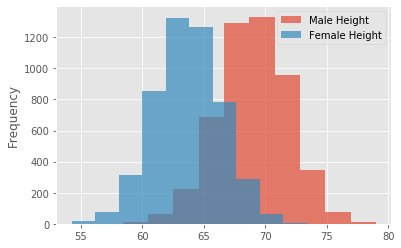

In [18]:
plt.hist(male_df.Height, bins=10, alpha=0.7, label='Male Height')
plt.hist(female_df.Height, bins=10, alpha=0.7, label='Female Height');
plt.ylabel('Frequency')
plt.legend()
plt.show()

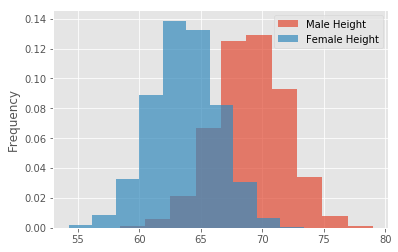

In [17]:
# Your code here


In [18]:
# Record your observations - are these inline with your personal observations?

# they are pretty inline with my observations, but the local population, at least younger, seems to be taller
# for both males and females


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

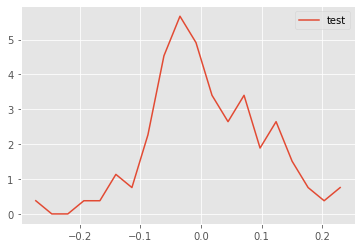

In [25]:
def density(x):
    
    n, bins = np.histogram(x, 20, density=1)
    
    xi = np.zeros(n.size) # interpolated x values
    yi = np.zeros(n.size) # interpoloated y values
    
    for k in range(n.size):
        xi[k] = 0.5 * (bins[k] + bins[k+1])
        yi[k] = n[k]
    
    return xi, yi


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

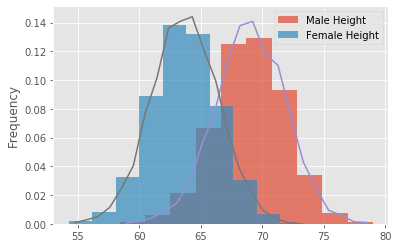

In [41]:

male_df.Height.plot.hist( bins=10, density=True, alpha=0.7, label='Male Height')
female_df.Height.plot.hist(bins=10, density=True, alpha=0.7, label='Female Height')


x_male,y_male = density(male_df.Height)
plt.plot(x_male,y_male)
x_female,y_female = density(female_df.Height)
plt.plot(x_female,y_female)

plt.ylabel('Frequency')
plt.legend()

plt.show()

In [38]:
# Your code here 

## Repeat the above exercise for male and female weights

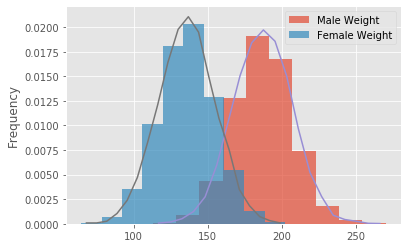

In [42]:
# Your code here 
male_df.Weight.plot.hist( bins=10, density=True, alpha=0.7, label='Male Weight')
female_df.Weight.plot.hist(bins=10, density=True, alpha=0.7, label='Female Weight')


x_male,y_male = density(male_df.Weight)
plt.plot(x_male,y_male)
x_female,y_female = density(female_df.Weight)
plt.plot(x_female,y_female)

plt.ylabel('Frequency')
plt.legend()

plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?

# they are inline with my personal observations


# What is the takeaway when comparing male and female heights and weights?

# male and female heights and weights have pretty similar distributions but different means

## Repeat the above experiments in seaborn and compare with your results

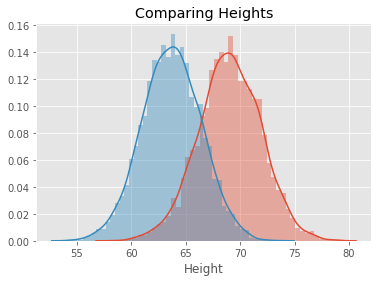

In [43]:
# Code for heights here
import seaborn as sns

sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

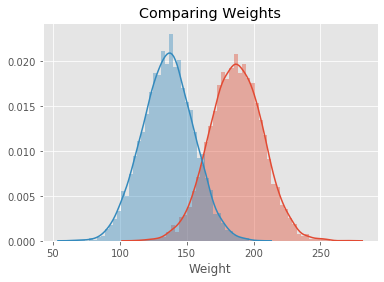

In [44]:
# Code for weights here
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [45]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

# the seaborn plots are smoother. the interpolated plots have higher peaks

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.